## A/B Paired Testing: Compare Means: Simulation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
reading_scores_df = pd.read_csv('../data_raw/reading.txt', header=None, sep='\t')
reading_scores_df.columns=["Without Music", "With Music"]
print(reading_scores_df)
print(reading_scores_df.shape)

    Without Music  With Music
0              24          27
1              79          80
2              17          18
3              50          50
4              98          99
5              45          47
6              97          97
7              67          70
8              78          79
9              85          87
10             76          78
(11, 2)


In [12]:
def swap(x):
    if(np.random.random()>0.5):
        return [x[1],x[0]]
    else:
        return [x[0],x[1]]
    
def shuffle_data(data):
    shuffled_df = data.apply(swap, axis=1, result_type='expand')
    mean_diff =(shuffled_df[shuffled_df.columns[1]].mean()-
     shuffled_df[shuffled_df.columns[0]].mean())
    return mean_diff

In [10]:
reading_scores_df.apply(swap, axis=1, result_type='expand')

,0,1
0,24,27
1,80,79
2,17,18
3,50,50
4,98,99
5,45,47
6,97,97
7,67,70
8,78,79
9,85,87


In [13]:
trials = []
n = 1000

for i in range(n):
    trials.append(shuffle_data(reading_scores_df))

In [14]:
trials_df = pd.DataFrame(trials, columns=['trial'])
pval =(trials_df['trial']>=1.45).sum()/float(n)
print("Paired comparison p-value: {0:.5f}".format(pval))


Paired comparison p-value: 0.00100


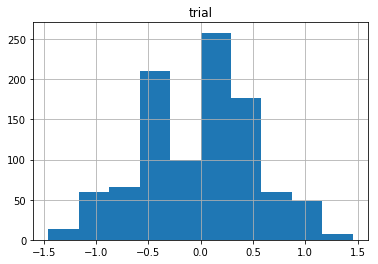

In [16]:
trials_df.hist('trial')
plt.show()